# Исследование объявлений о продаже квартир

**Описание проекта**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных**

  - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
  - `balcony` — число балконов;
  - `ceiling_height` — высота потолков (м);
  - `cityCenters_nearest` — расстояние до центра города (м);
  - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
  - `first_day_exposition` — дата публикации;
  - `floor` — этаж;
  - `floors_total` — всего этажей в доме;
  - `is_apartment` — апартаменты (булев тип);
  - `kitchen_area` — площадь кухни в квадратных метрах (м²);
  - `last_price` — цена на момент снятия с публикации;
  - `living_area` — жилая площадь в квадратных метрах (м²);
  - `locality_name` — название населённого пункта;
  - `open_plan` — свободная планировка (булев тип);
  - `parks_around3000` — число парков в радиусе 3 км;
  - `parks_nearest` — расстояние до ближайшего парка (м);
  - `ponds_around3000` — число водоёмов в радиусе 3 км;
  - `ponds_nearest` — расстояние до ближайшего водоёма (м);
  - `rooms` — число комнат;
  - `studio` — квартира-студия (булев тип);
  - `total_area` — общая площадь квартиры в квадратных метрах (м²);
  - `total_images` — число фотографий квартиры в объявлении

## Загрузка данных

In [1]:
# делаем импорты библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# делаем выгрузку данных в датафрейм
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')
print(data.head(5))

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Обнаружили, что в качестве разделителей выступает '\t', поэтому исправим выгрузку

In [3]:
# при исправлении получаем читаемую таблицу и статистику по ней
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',
                       sep = '\t')

# выводим первые строки и общую информаццию 
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

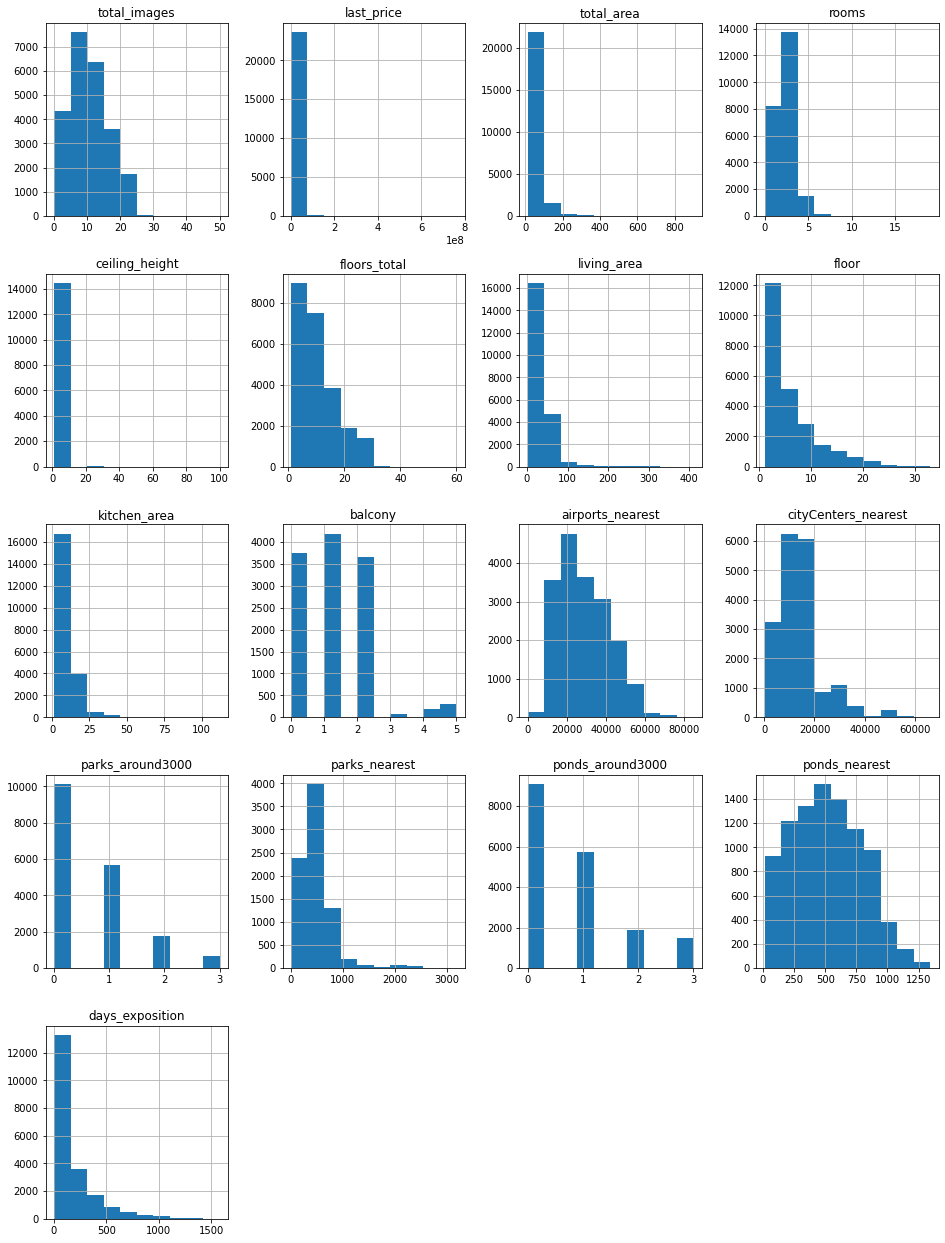

In [4]:
# строим гисторгаммы по каждому столбцу
data.hist(figsize=(16, 22))
plt.show()

**Вывод:**

Метод info() показал, что в таблице по 14 из 22 столбцов есть пропуски, по части из них пропуски есть в более чем 50% ячеек. Надо разобраться, какие пропуски не помешают исследованию, а какие нужно заполнить. Также мы видим, что по части столбцов нужно исправить тип данных.

В столбцах 'total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'floor', 'studio', 'open_plan' нет пропусков.

В столбцах 'floors_total' и 'locality_name' очень незначительное число пропусков: 86 и 49 соответственно или 0,4% и 0,2% от выборки, поэтому этими пропусками можно легко пренебречь.

В столбцах 'living_area' и 'kitchen_area' пропусков 1903 и 2278 соответственно. Это довольно высокие значения, доля пропусков получается в пределах 10%. Пропущенные значения, вероятно, не были указаны пользователями, некоторые пользователи могли решить, что более важный показатель - общая площадь, а площади кухни и жилых помещений не столь важны. Значения данных столбцов будут нам нужны для шага 4 как факторы, влияющие на цену, поэтому нужно постараться их заполнить. Как вариант попробуем заполнить пропуски медианными значениями по жилой и кухонной площади, посчитанными отдельно для каждого кол-ва этажей в квартире. Однако после такой замены нужно сделать проверку по площадям в квартире: логично, что 'total_area' не может быть меньше, чем сумма 'living_area' и 'kitchen_area'. Если указанное условие не выполняется и таких случаев сравнительно немного, можно удалить такие строки.

## Предобработка данных

In [5]:
# заполним пропуски по жилой площади медианными значениями жилой площади по квартирам с тем же кол-вом комнат
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna()),
             'living_area'] = data.loc[(data['rooms'] == r
                                       ) & (data['living_area'].notna()),
                                       'living_area'].median()

In [6]:
# заполним пропуски по площади кухни медианными значениями жилой площади по квартирам с тем же кол-вом комнат
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()),
             'kitchen_area'] = data.loc[(data['rooms'] == i
                                        ) & (data['kitchen_area'].notna()),
                                        'kitchen_area'].median()

In [7]:
# посмотрим список уникальных значений кол-ва комнат
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [8]:
# уберем выбросы - строки с большим кол-вом комнат
data = data.query('rooms < 11')
# проверим оставшиеся пропуски по 'living_area'
print(data['living_area'].isna().sum())
# проверим оставшиеся пропуски по 'kitchen_area'
print(data['kitchen_area'].isna().sum())

0
197


In [9]:
# заполняем пропуски по площади кухни медианными значениями по всей выборке
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
# проверяем, остались ли пустые значения
data['kitchen_area'].isna().sum()

0

Проверяем, не нарушили ли наши замены логику площади в квартире: сумма жилой и кухонной площади не может быть больше общей площади квартиры

In [10]:
# проверяем, не нарушена ли логика площадей в квартире
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area']
        ]['living_area'].count()

423

In [11]:
# 423 строчки после заполнения площадей не удовлетворяют условию, эти строки можно удалить
data = data.query('(living_area + kitchen_area) <= total_area')
# снова делаем проверку, чтобы убедиться, что удаление сработало правильно
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area']
        ]['living_area'].count()

0

В столбце 'ceiling_height' пропуски составляют около 40%. По какой-то причине многие пользователи не указали высоту потолков: их сложно измерить, либо пользователи могут сознательно скрывать высоту потолков, поскольку сравнительно низкие потолки могут отпугнуть покупателя. В данном случае можно заменить пустые значения на медианные, ведь медиана не чувствительна к выбросам. 

In [12]:
data['ceiling_height'] = data['ceiling_height'
                             ].fillna(value=data['ceiling_height'].median())
# проверим, что пустых значений не осталось
data['ceiling_height'].isna().sum()

0

В столбце 'is_apartment' мы видим очень много пропусков, а также вероятно неверный тип значений. Здесь в качестве значений заносятся булевы переменные как и в столбцах 'studio' и 'open_plan'. Пользователь мог не указать ничего в случаях, если жилье не является апартаментами. Для начала выведем все уникальные значения ячейках столбца, а затем при необходимости проведём замену. 

In [13]:
print(data['is_apartment'].unique())

[nan False True]


Результат кода показывает наличие пропусков помимо булевых значений. Логично, если пропуски относятся к случаям, когда объект недвижимости не является апартаментами, поэтому об этом не было указано.

In [14]:
# заменим пропуски на False и распечатаем уникальные значения
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[False  True]


In [15]:
# проверим тип данных, убедимся что тип данных после замены значений также поменялся
data['is_apartment'].dtypes

dtype('bool')

Почти 50% пропусков мы видим в столбце 'balcony'. Выведем все уникальные значения. Аналогично столбцу 'is_apartment' пропуски скорее говорят о том, что в квартире нет балкона, иначе бы об этом было указано пользователем. Поэтому в данном столбце можно заменить пропуски на 0.

In [16]:
# выводим уникальные значения
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


In [17]:
# заменим пропуски на 0
data['balcony'] = data['balcony'].fillna(0)
# заменим тип значений для признака
data['balcony'] = data['balcony'].astype('int')
# убедимся, что тип данных поменялся
data['balcony'].dtypes

dtype('int64')

Пропуски значений в столбце 'days_exposition' составляют 13,4%. Значения в этом слобце скорее считаются системой в зависимости от указанной даты первого дня объявления, но по какой-то причине не были указаны, возможно, что объявления были сняты пользователем, а квартира так и не была продана в случае пропусков. Решаем оставить эти пропуски без изменений.

Для рассмотрения у нас остались пропуски значений в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'. Значения по этим столбцам получены автоматически на основе картографических данных. Возможно автоматическое заполнение этих данных работает неидеально, нужно обратиться к разработчикам. Но попробуем заполнить некоторые из них, где больше всего пропусков, действуя логически. Больше всего пропусков мы видим в столбцах 'parks_nearest' и 'ponds_nearest'. Проверим, каким значениям в 'parks_around3000' и 'ponds_around3000' соответсвуют пропуски в 'parks_nearest' и 'ponds_nearest'. 

In [18]:
data[data['parks_nearest'].isna()]['parks_around3000'].value_counts()

0.0    9928
Name: parks_around3000, dtype: int64

In [19]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts()

0.0    8958
Name: ponds_around3000, dtype: int64

Мы видим, что кол-во парков в радиусе 3000 м равняется 0 для всех случаев пропусков в parks_nearest. Мы видим, что кол-во прудов в радиусе 3000 м равняется 0 для всех случаев пропусков в ponds_nearest.

In [20]:
# посмотрим уникальные значения кол-ва парков
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [21]:
# посмотрим уникальные значения кол-ва прудов
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

Данные о том, что в радиусе 3000 м нет парков, представляются сомнительными, поэтому заменим все значения 0 на 1. То же касается и данных о наличии прудов в радиусе 3000 м, поэтому заменим все значения 0 на 1. Также для этих признаков заменим пустые значения значениями 1.

Также заменим пустые значения расстояний до ближайшего парка для случаев, когда в радиусе 3000 м находится один парк, на медианнное расстояние до парка для таких случаев с непустыми значениями, а пустые значения расстояний до ближайшего пруда для случаев, когда в радиусе 3000 м находится один пруд, на медианнное расстояние до пруда.

In [22]:
# выполняем замены
data['parks_around3000'].replace({0: 1}, inplace=True)
data['ponds_around3000'].replace({0: 1}, inplace=True)
data['parks_around3000'] = data['parks_around3000'].fillna(1)
data['ponds_around3000'] = data['ponds_around3000'].fillna(1)

In [23]:
# выполняем замены
data.loc[(data['parks_around3000'] == 1) & (data['parks_nearest'].isna()
                                           ), 'parks_nearest'
        ] = data.loc[(data['parks_around3000'] == 1) & (data['parks_nearest'].notna()),
                     'parks_nearest'].median()

data.loc[(data['ponds_around3000'] == 1) & (data['ponds_nearest'].isna()),
         'ponds_nearest'
        ] = data.loc[(data['ponds_around3000'] == 1) & (data['ponds_nearest'].notna()),
                                     'parks_nearest'].median()

In [24]:
# проверим оставшееся кол-во незаполненных значений по всем столбцам
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23268 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23268 non-null  int64  
 1   last_price            23268 non-null  float64
 2   total_area            23268 non-null  float64
 3   first_day_exposition  23268 non-null  object 
 4   rooms                 23268 non-null  int64  
 5   ceiling_height        23268 non-null  float64
 6   floors_total          23191 non-null  float64
 7   living_area           23268 non-null  float64
 8   floor                 23268 non-null  int64  
 9   is_apartment          23268 non-null  bool   
 10  studio                23268 non-null  bool   
 11  open_plan             23268 non-null  bool   
 12  kitchen_area          23268 non-null  float64
 13  balcony               23268 non-null  int64  
 14  locality_name         23220 non-null  object 
 15  airports_nearest   

Мы видим, что пропуски ещё есть в таблице, но их уже не так немного. Оставшиеся пропуски не относятся к наиболее важным параметрам для нашего исследования, поэтому мы решаем продолжить работу с таблицей в таком виде.  

Посмотрим ещё раз тип данных по всем столбцам и оценим, можно ли в каких из них исправить тип:

In [25]:
  data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Есть необходимость перевести строчный формат для столбца 'first_day_exposition' в формат даты и времени. Используем для этого функцию pd.to_datetime и укажем в агрументе formant тот, что соответсвует данным в таблице:

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')
# проверяем тип данных после изменения, чтобы убедиться что тип поменялся
print(data['first_day_exposition'].dtypes)

datetime64[ns]


Тип данных в столбцах 'floors_total' и 'days_exposition' можно было бы исправить на integer, поскольку количество этажей и кол-во дней размещения объявления представляют собой целые числа, но у нас есть пропуски (nan), которые мы не можем заполнить, поэтому тип данных остаётся float. 

Больше ни в каких столбцах не следует менять тип данных.

Поменяем названия некоторых столбоц так, чтобы они лучше воспронимались. Для этого приведем все названия к змеиному регистру:

In [27]:
# изменяем названия столбцов
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})

In [28]:
# попробуем выявить неявные дубликаты в столбце 'locality_name'
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [29]:
#выполним замену ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# уберём обозначения типа населённого пункта, и таким образом удалим оставшиеся неявные дубликаты
data['locality_name'] = data['locality_name'].replace(['поселок городского типа ',
                                                       'поселок при железнодорожной станции ',
                                                       'поселок станции ', 'коттеджный поселок ',
                                                       'городской поселок ', 'садовое товарищество ',
                                                       'деревня ',
                                                       'село ',
                                                       'садоводческое некоммерческое товарищество ',
                                                       'поселок ', 'коттеджный поселок '
                                                      ], '', regex=True)
# снова напечатаем уникальные значения в столбце 'locality_name'
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичево', 'И

Теперь мы видим, что бОльшая часть дублей устранена. В значениях названий населенных пунктов ещё могут быть сотаваться незначительное кол-во дублей из-за опечаток, их выявить сложнее, не будем этого делать для нашего исследования.

In [30]:
# заполняем расстояние до центра, аэропорта для небольших насленных пунктов
small_locality = data[data['locality_name']!="Санкт-Петербург"]['locality_name'].unique()
for locality in small_locality:
    data.loc[
        (data['locality_name']==locality) & data['airports_nearest'].isna(),
        'airports_nearest'] = data.loc[
        (data['locality_name']==locality) & data['airports_nearest'].notna(),
        'airports_nearest'].median()
    
  
    data.loc[
        (data['locality_name']==locality) & data['city_centers_nearest'].isna(),
        'city_centers_nearest'] = data.loc[
        (data['locality_name']==locality) & data['city_centers_nearest'].notna(),
        'city_centers_nearest'].median()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23268 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23268 non-null  int64         
 1   last_price            23268 non-null  float64       
 2   total_area            23268 non-null  float64       
 3   first_day_exposition  23268 non-null  datetime64[ns]
 4   rooms                 23268 non-null  int64         
 5   ceiling_height        23268 non-null  float64       
 6   floors_total          23191 non-null  float64       
 7   living_area           23268 non-null  float64       
 8   floor                 23268 non-null  int64         
 9   is_apartment          23268 non-null  bool          
 10  studio                23268 non-null  bool          
 11  open_plan             23268 non-null  bool          
 12  kitchen_area          23268 non-null  float64       
 13  balcony         

**Вывод:**

Итак, мы закончили предобработку данных. Там где это было возможно и не оказывало влияния на наши данные мы заполнили пропуски медианными значениями (так сделали для высоты потолков). Где-то мы заполнили пропуски булевыми или нулевыми значениями (кол-во балконов, апартаменты), что было тоже логично. Также мы преположили, что в радиусе 3000 м есть хотя бы одно озеро или парк и заполнили пропуски таким образом по кол-ву ближаших парков/ озер в радиусе 3000 м и затем заполнили расстояния до парка, озера медианными значениями. Для небольших населенных пунктов (кроме Санкт-Петербурга) пропуски до центра и аэропорта мы заполнили медианными расстояниями по квартирам в том же населенном пункте. Какие-то пропуски мы оставили как есть, потому что сложно было логически подобрать значения, не испортившие общей выборки. Также мы поменяли тип данных для части столбцов, чтобы удобно было работать с этими данными в дальнейшем ('first_day_exposition', 'is_apartment', 'balcony'). И наконец мы удалили неявные дубликаты по столбцу со названиями населенных пунктов 'locality_name'.

## Добавление в таблицу новых столбцов

In [32]:
# добавляем колонку со значениями цены одного квадратного метра для каждого объекта
data['square_m_price'] = round(data['last_price'] / data['total_area'], 2)
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
# год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [33]:
# cоздаем функцию для категоризации этажа квартиры
# получаем 3 категории этажей: первый, последний, другой
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# расстояние до центра города в километрах
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000, 0)

# смотрим результат по первым значениям
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_m_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,501.0,1.0,501.0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,501.0,1.0,501.0,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,501.0,1.0,501.0,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,501.0,1.0,501.0,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,501.0,1.0,501.0,189.0,87454.76,2,5,2018,другой,22.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,501.0,1.0,501.0,289.0,88524.59,6,2,2017,другой,15.0


**Вывод:**

Итак, мы добавили 6 новых столбцов в таблицу:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние от центра города в километрах;

Для категоризации этажа квартиры мы создали функцию, которая определяет категорию в зависимости от двух параметров: этаж квартиры и количество этажей в доме.

После вывода первых строк таблицы мы убедились, что все столбцы добавились верно.

## Исследовательский анализ данных

**Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров**

In [34]:
# посмотрим описание данных по столбцу с общей площадью квартир
data['total_area'].describe()

count    23268.000000
mean        60.709853
std         34.929565
min         14.000000
25%         40.400000
50%         52.280000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

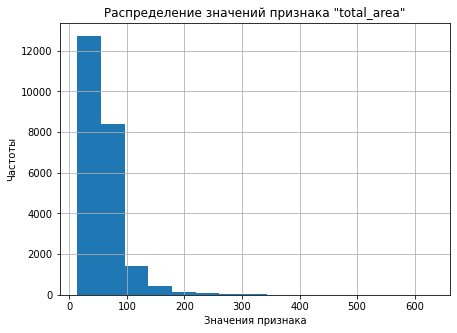

In [35]:
# строим гистограмму
data['total_area'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "total_area"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

Описание данных и гистрограмма показывают, что большие значения являются выбросами, которые можно удалить из таблицы.

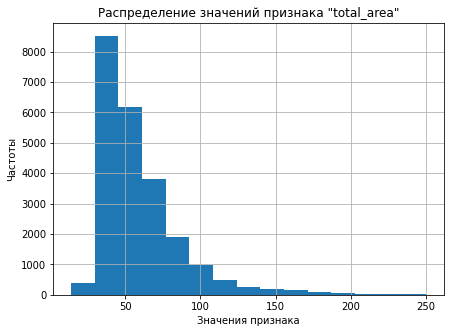

In [36]:
# повторно строим гистограмму, отбросив значения выше 250
good_data = data.query('total_area <= 250')
good_data['total_area'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "total_area"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В таблице было незначительное число выбросов по столбцу 'total_area' со значениями вплоть до 631. Мы создали новую таблицу с очищенными от выбросов данными по общей площади квартир, теперь мы получили более типичную гистограмму с распределением Пуассона. Медианное значение общей площади находится в районе 50 кв. метров.

In [37]:
# посмотрим описание данных по столбцу с жилой площадью
good_data['living_area'].describe()

count    23161.000000
mean        33.727612
std         18.643850
min          2.000000
25%         18.500000
50%         30.400000
75%         42.500000
max        200.000000
Name: living_area, dtype: float64

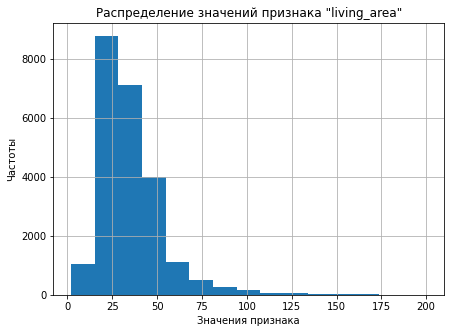

In [38]:
# построим гистрограмму по 'living_area'
good_data['living_area'].hist(bins=15, figsize=(7, 5))
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.title('Распределение значений признака "living_area"')
plt.show()

В столбце 'living_area' есть значения от 100 до 204, которые выбиваются из общего тренда, но примерно соответсвует общей площади квартир (до 250 кв. м), так что мы оставили эти значения. Гистограмма также имеет вид распределения Пуассона. Медианное значение общей площади находится в районе 30 кв. метров.

In [39]:
# посмотрим описание данных по столбцу с площадью кухни
good_data['kitchen_area'].describe()

count    23161.00000
mean        10.35296
std          5.33146
min          1.30000
25%          7.20000
50%          9.04000
75%         11.50000
max        107.00000
Name: kitchen_area, dtype: float64

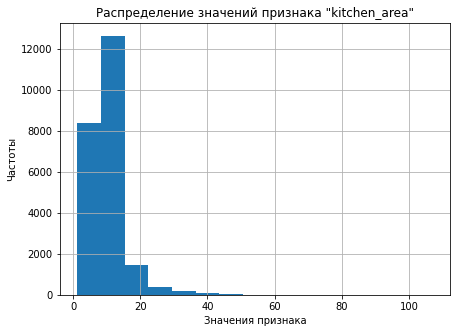

In [40]:
# построим гистрограмму
good_data['kitchen_area'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "kitchen_area"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

Видим, что 75% квартир имеют площадь в пределах 11,5 кв. м., тогда как максимальное значение в 9 раз выше. По гистаграмме мы видим, что выбросы более 50 очень незначительны, эти данные можно удалить

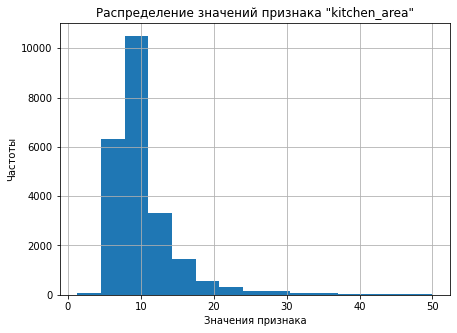

In [41]:
good_data = good_data.query('kitchen_area <= 50')

# повторно строим гистограмму, предварительно отбросив значения выше 50
good_data['kitchen_area'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "kitchen_area"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце таблицы 'kitchen_area' было незначительное число выбросов со значениями более 50 кв. м, которые портили представление о данных по гистрограмме. Мы очистили таблицу от выбросов по 'kitchen_area', теперь мы получили более типичную гистограмму с распределением Пуассона. Мы видим, что медианное значение площади кухни находится в районе 10 кв. метров.

In [42]:
# посмотрим описание данных по цене
good_data['last_price'].describe()

count    2.312800e+04
mean     6.181808e+06
std      6.797478e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

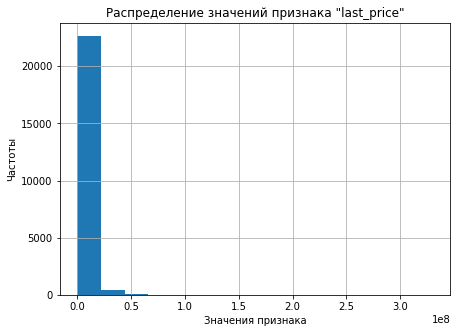

In [43]:
# строим гистограмму
good_data['last_price'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "last_price"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

Высокое значение стандартного отклонения также показывает, что в данных есть выбросы. Выбросы показывает и гистограмма.

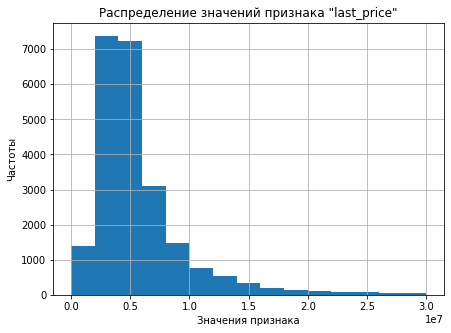

In [44]:
# повторно строим гистограмму, предварительно отбросив значения выше 30 млн.
good_data = good_data.query('last_price <= 30000000')
good_data['last_price'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "last_price"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце 'last_price' было незначительное число выбросов со значениями до 330 млн., которые портили представление о данных по гистрограмме. Мы очистили таблицу от выбросов, убрав значения выше 30 млн., теперь мы получили более типичную гистограмму с распределением Пуассона. Мы видим, что медианное значение цены квартиры находится в районе 5 млн.

In [45]:
# посмотрим описание данных по кол-ву комнат
good_data['rooms'].describe()

count    22912.000000
mean         2.047922
std          0.995503
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

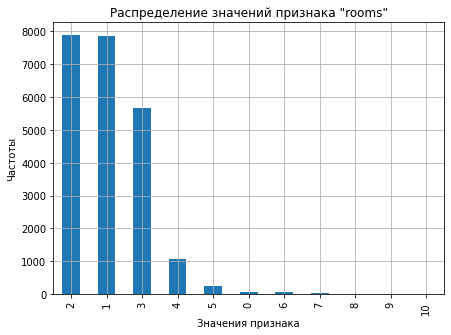

In [46]:
# строим график по кол-ву комнат
good_data['rooms'].value_counts().plot(kind='bar', grid=True,
                                       figsize=(7, 5))
plt.title('Распределение значений признака "rooms"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце 'rooms' число комнат распределено от 1 до 10. Медианное значение - 2 комнаты, а 75% квартир имеют кол-во комнат в пределах 3. Значения от 6 до 10 несколько выбиваются из общих данных, но они не оказывают существенного влияния на вид гистограммы. Мы оставили высокие значения, на графике получили распределением Пуассона.

In [47]:
# посмотрим описание данных по высоте потолка
good_data['ceiling_height'].describe()

count    22912.000000
mean         2.715828
std          0.961504
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

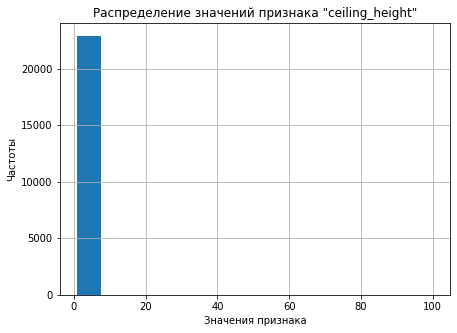

In [48]:
# строим гистограмму
good_data['ceiling_height'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "ceiling_height"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

75% квартир имеют потолок высотой до 2,7 метров, при этом максимальное значение - 100. Явно есть аномалии в данных. Гистограмма также показывает наличие незначительной части выбросов с аномально высокими значениями, которые сильно портят вид гистограммы.

In [49]:
# посмотрим уникальные значения
good_data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.4 ,
         2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,
         2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,
         2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,   2.68,
         2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,   2.76,
         2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,
         2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,
         2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   3.  ,   3.01,
         3.02,   3.03,   3.04,   3.05,   3.06,   3.07,   3.08,   3.09,
         3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,   3.16,   3.17,
         3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,   3.26,
         3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,   3.33,   3.34,
         3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.44,
         3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,   3.52,
      

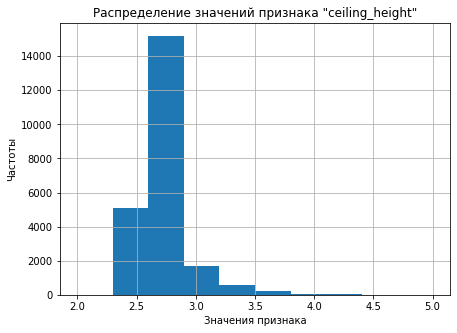

In [50]:
# делаем замену для явных опечаток в данных
good_data['ceiling_height'].replace({22.6: 2.26, 24: 2.4, 25: 2.5, 26: 2.6,
                                     27: 2.7, 27.5: 2.75}, inplace=True)
# затем убираем оставшиеся строки с аномальными значениями выше 5 и ниже 2
good_data = good_data.query('2 <= ceiling_height <= 5')
# повторно строим гистограмму
good_data['ceiling_height'].hist(bins=10, figsize=(7, 5))
plt.title('Распределение значений признака "ceiling_height"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце 'ceiling_height' выбросы до 100 оказывали сильное влияние на вид гистограммы. Медианное значение - 2,65 м, а 75% квартир имеют значения высоты потолка в пределах 2,7 м. Мы заменили значения в тех местах, где логично было предположить ошибку в данных - на уменьшенные в 10 раз вещественные значения. А оставшиеся аномальные значения больше 5 метров и ниже 2 метров мы удалили. В итоге мы получили гистограмму с распределением Пуассона.

In [51]:
# описание данных по типу этажа квартиры
good_data['floor_type'].describe()

count      22898
unique         3
top       другой
freq       16856
Name: floor_type, dtype: object

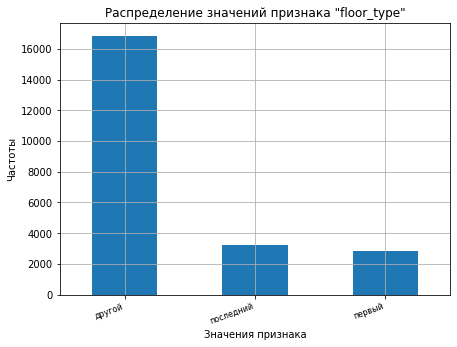

In [52]:
# выводим гистрограмму
good_data['floor_type'].value_counts().plot(grid=True, kind='bar',
                                            figsize=(7, 5))
plt.title('Распределение значений признака "floor_type"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.xticks(fontsize=8, rotation=20, ha='right')
plt.show()

На гистограмме по столбцу 'floor_type' представлены все три установлненных ранее типа этажей: другой, первый, последний. Более 70% всех квартир составляют квартиры с типом этажа 'другой', т.е. квартиры не на первом и не на последнем этажах, что логично.

In [53]:
# описание данных по кол-ву этажей в доме
good_data['floors_total'].describe()

count    22822.000000
mean        10.657918
std          6.575481
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

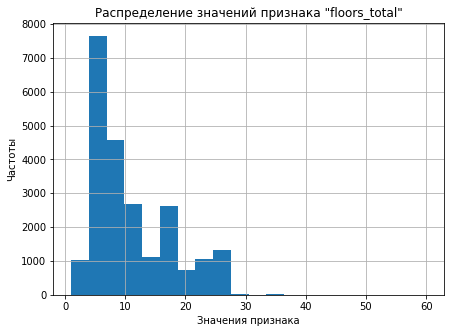

In [54]:
# строим гистограмму
good_data['floors_total'].hist(bins=20, figsize=(7, 5))
plt.title('Распределение значений признака "floors_total"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

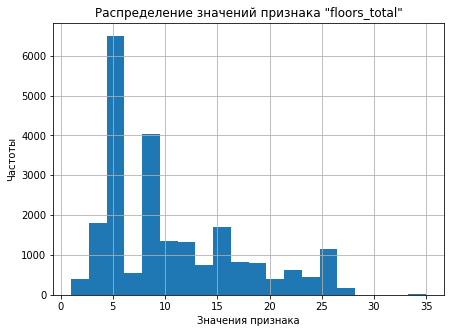

In [55]:
# убираем аномальные значения и снова строим гистограмму
good_data = good_data.query('floors_total <= 35')
good_data['floors_total'].hist(bins=20, figsize=(7, 5))
plt.title('Распределение значений признака "floors_total"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

Медианное значение по столбцу 'floors_total' составляют квартиры в 9-ти этажных домах. 75% квартир находятся в домах не более чем в 16 этажей. В выборке представлены дома от 1 до 60 этажей. В этих цифрах явно есть аномалия, известный на сегодня самый высокий жилой дом в Санкт-Петербурге имеет этажность в 35 этажей. На гистограмме мы видим несколько пиков, самый высокий находится выше медианного значения в районе 5-6 этажей. 

In [56]:
# описание данных по столбцу с расстоянием до центра города в метрах
good_data['city_centers_nearest'].describe()

count    18032.000000
mean     14595.714036
std       8597.991985
min        208.000000
25%       9746.000000
50%      13355.000000
75%      16788.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

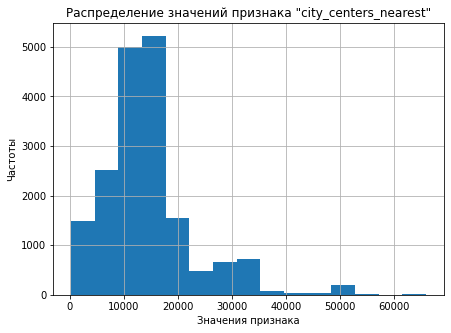

In [57]:
# строим гистограмму
good_data['city_centers_nearest'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "city_centers_nearest"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце 'city_centers_nearest' медиана приходится на 13199 метров, а 75% квартир находятся в пределах 16378 метров от центра. При этом максимальное значение составляет около 66 тысяч метров. Высокие значения не оказывают сущестеннного влияния на вид гистограммы.

In [58]:
# описание данных по столбцу с расстоянием до ближайшего парка
good_data['parks_nearest'].describe()

count    22817.000000
mean       498.420169
std        198.420561
min          1.000000
25%        501.000000
50%        501.000000
75%        501.000000
max       3190.000000
Name: parks_nearest, dtype: float64

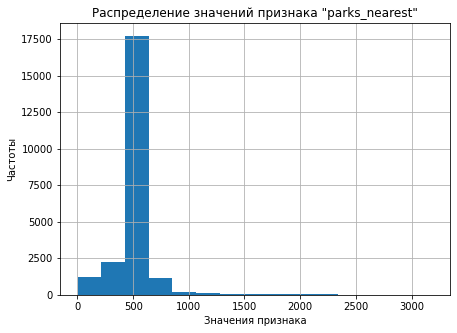

In [59]:
# строим гистограмму
good_data['parks_nearest'].hist(bins=15, figsize=(7, 5))
plt.title('Распределение значений признака "parks_nearest"')
plt.ylabel('Частоты')
plt.xlabel('Значения признака')
plt.show()

В столбце 'parks_nearest' медиана приходится на 501 метр, и 75% квартир находятся в пределах 501 метра от ближайшего парка. При этом максимальное значение составляет 3190 метров. Высокие значения не оказывают сущестеннного влияния на вид гистограммы. В результате мы получили гистограмму с распределением Пуассона.

**Изучим, как быстро продавались квартиры** 

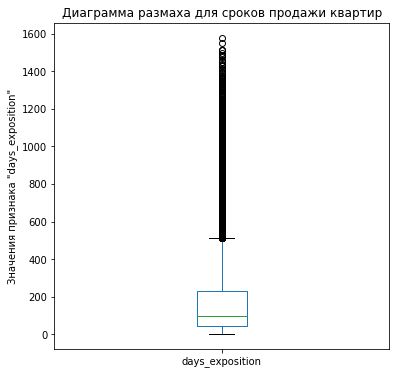

In [60]:
# строим график типа box plot по срокам продажи квартир
good_data['days_exposition'].plot.box(figsize = (6, 6))
plt.ylabel('Значения признака "days_exposition"')
plt.title('Диаграмма размаха для сроков продажи квартир')
plt.show()

In [61]:
# посмотрим описательную статистику по срокам продажи квартир
good_data['days_exposition'].describe()

count    19769.000000
mean       180.530376
std        218.726337
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение срока продажи квартиры по столбцу 'days_exposition' составляет 96 дней, т.е. половина квартир были проданы в пределах этого срока. На графике это значение отмечено зелёной линией. Среднее значение почти в два раза больше - 180,5 дней, что связано с тем, что среднее значение подвержено выбросам. 

75% квартир продалось в течение 231 дней. На графике это верхняя граница ящика, соответствующая 3-му квартилю. Можно сказать, что большая часть квартир продается в срок от 1 до 8 месяцев. Быстрыми продажами можно считать продажи в срок не более 1,5 месяцев, т.е. со сроком в первом квартиле (25%), на графике это продажи под нижней границей ящика. По графику также можно сказать, что необычно долгими продажами будут те, что выходят за пределы верхнего уса графика и являются выбросами. Это продажи от 500 дней. На графике их довольно много и они сливаются в чёрную линию. Самая долгая продажа в базе составляет 1580 дней, т.е. дольше 4 лет.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

In [62]:
# выводим коэффициент корреляции между признаками
print('Коэффициент корреляции между ценой объекта и общей площадью:',
      round(good_data['last_price'].corr(good_data['total_area']), 2))

Коэффициент корреляции между ценой объекта и общей площадью: 0.79


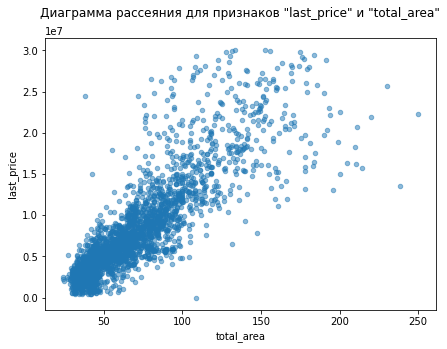

In [63]:
# строим график зависимости медианной цены объекта от общей плошади
good_data.pivot_table(index='last_price', values = 'total_area',
                      aggfunc = 'median').reset_index().plot(x='total_area',
                                                             y='last_price',
                                                             kind='scatter',
                                                             alpha=0.5,
                                                             figsize=(7, 5))
plt.title('Диаграмма рассеяния для признаков "last_price" и "total_area"\n')
plt.show()

In [64]:
# выводим коэффициент корреляции между признаками
print('Коэффициент корреляции между ценой объекта и жилой площадью:',
      round(good_data['last_price'].corr(good_data['living_area']), 2))

Коэффициент корреляции между ценой объекта и жилой площадью: 0.66


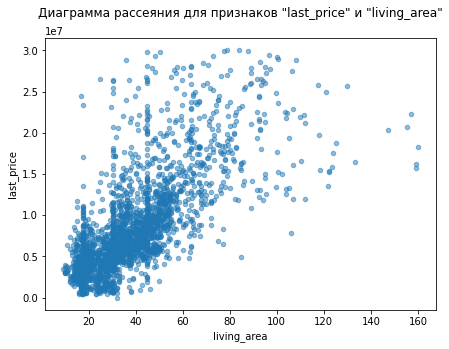

In [65]:
# строим график зависимости медианной цены объекта от жилой плошади
good_data.pivot_table(index='last_price', values = 'living_area',
                      aggfunc = 'median').reset_index().plot(x='living_area',
                                                             y='last_price',
                                                             kind='scatter',
                                                             alpha=0.5,
                                                             figsize=(7, 5))
plt.title('Диаграмма рассеяния для признаков "last_price" и "living_area"\n')
plt.show()

In [66]:
# выводим коэффициент корреляции между признаками
print('Коэффициент корреляции между ценой объекта и площадью кухни:',
      round(good_data['last_price'].corr(good_data['kitchen_area']), 2))

Коэффициент корреляции между ценой объекта и площадью кухни: 0.58


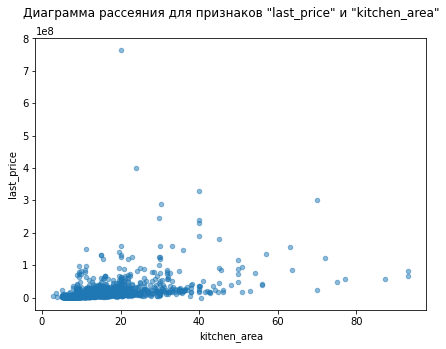

In [67]:
# строим график зависимости медианной цены объекта от плошади кухни
data.pivot_table(index='last_price', values = 'kitchen_area',
                 aggfunc = 'median').reset_index().plot(x='kitchen_area',
                                                        y='last_price',
                                                        kind='scatter',
                                                        alpha=0.5,
                                                        figsize=(7, 5))
plt.title('Диаграмма рассеяния для признаков "last_price" и "kitchen_area"\n')
plt.show()

In [68]:
# выводим коэффициенты корреляции между признаками
print('Коэффициент корреляции между ценой объекта и кол-вом комнат:',
      round(good_data['last_price'].corr(good_data['rooms']), 2))

Коэффициент корреляции между ценой объекта и кол-вом комнат: 0.51


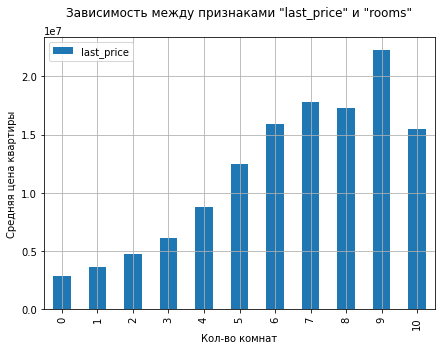

In [69]:
# строим график зависимости медианнной цены объекта от кол-ва комнат
good_data.pivot_table(index='rooms', values = 'last_price',
                      aggfunc = 'median').reset_index().plot(grid=True,
                                                             x='rooms',
                                                             y='last_price',
                                                             kind='bar',
                                                             figsize=(7, 5))
plt.ylabel('Средняя цена квартиры')
plt.xlabel('Кол-во комнат')
plt.title('Зависимость между признаками "last_price" и "rooms"\n')
plt.show()

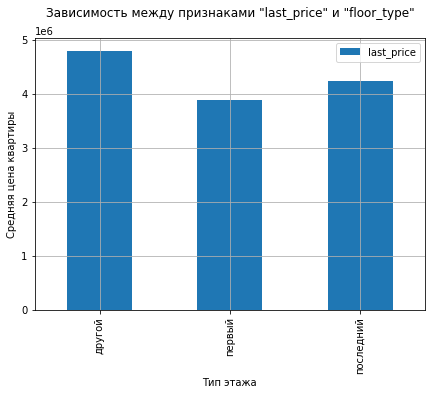

In [70]:
# строим график зависимости между типом этажа и медианной ценой объекта для каждого типа этажа
good_data.pivot_table(index='floor_type', values = 'last_price',
                      aggfunc = 'median'
                     ).reset_index().plot(grid = True,
                                          kind = 'bar',
                                          x='floor_type',
                                          y='last_price',
                                          figsize=(7, 5))
plt.ylabel('Средняя цена квартиры')
plt.xlabel('Тип этажа')
plt.title('Зависимость между признаками "last_price" и "floor_type"\n')
plt.show()

In [71]:
# выводим коэффициенты корреляции между признаками
print('Коэффициент корреляции между ценой объекта и днём размещения объявления:',
      good_data['last_price'].corr(good_data['day_of_week_exposition']))

Коэффициент корреляции между ценой объекта и днём размещения объявления: -0.02125826581692287


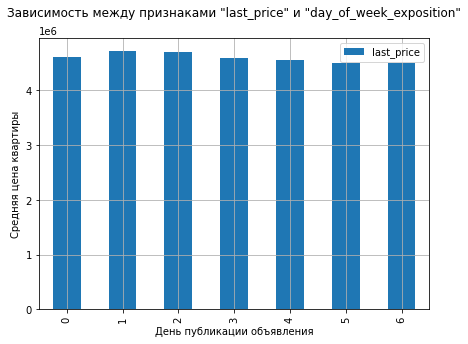

In [72]:
# строим график зависимости медианной ценой объекта от дня публикации объявления
good_data.pivot_table(index='day_of_week_exposition', values = 'last_price',
                      aggfunc = 'median').reset_index().plot(grid = True,
                                                             x='day_of_week_exposition',
                                                             y='last_price',
                                                             kind='bar',
                                                             figsize=(7, 5))
plt.ylabel('Средняя цена квартиры')
plt.xlabel('День публикации объявления')
plt.title('Зависимость между признаками "last_price" и "day_of_week_exposition"\n')
plt.show()

In [73]:
# выводим коэффициенты корреляции между признаками
print('Коэффициент корреляции между ценой объекта и месяцем размещения объявления:',
      good_data['last_price'].corr(good_data['month_exposition']))

Коэффициент корреляции между ценой объекта и месяцем размещения объявления: 0.004966695383370045


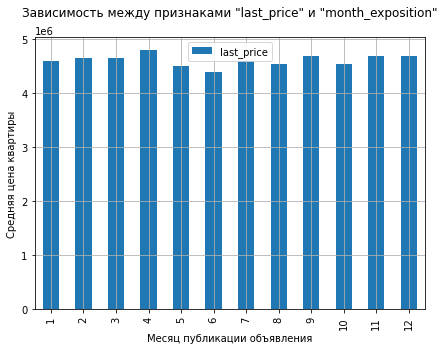

In [74]:
# строим график зависимости медианной ценой объекта от месяца публикации объявления
good_data.pivot_table(index='month_exposition', values = 'last_price',
                      aggfunc = 'median').reset_index().plot(grid = True,
                                                             x='month_exposition',
                                                             y='last_price',
                                                             kind='bar',
                                                             figsize=(7, 5))
plt.ylabel('Средняя цена квартиры')
plt.xlabel('Месяц публикации объявления')
plt.title('Зависимость между признаками "last_price" и "month_exposition"\n')
plt.show()

In [75]:
# выводим коэффициенты корреляции между признаками
print('Коэффициент корреляции между ценой объекта и годом размещения объявления:',
      good_data['last_price'].corr(good_data['year_exposition']))

Коэффициент корреляции между ценой объекта и годом размещения объявления: -0.03819551618422893


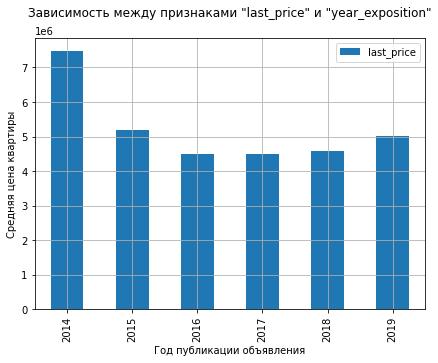

In [76]:
# строим график зависимости медианной цены объекта от года публикации объявления
good_data.pivot_table(index='year_exposition', values = 'last_price',
                      aggfunc = 'median').reset_index().plot(grid = True,
                                                             x='year_exposition',
                                                             y='last_price',
                                                             kind='bar',
                                                             figsize=(7, 5))
plt.ylabel('Средняя цена квартиры')
plt.xlabel('Год публикации объявления')
plt.title('Зависимость между признаками "last_price" и "year_exposition"\n')
plt.show()

Мы определили параметры, которые влияют на цену объекта. Там, где было возможно и уместно, мы посчитали коэффициент корреляции. А также для количественных переменных мы построили диаграммы размаха, по которым также легко отследить общие тренды, зависимости.

Мы видим, что максимально цена объекта зависит от общей площади: чем больше медианное значение площади, тем выше значение цены. Коэффициент корреляции между ценой и общей площадью - 0,79. При этом все равно есть некоторая доля выбросов и точек, не укладывающихся в эту тенденцию, особенно это наблюдается для высоких значений цены. Также по граффикам и коэффициентам корреляции прослеживается зависимость цены от жилой площади (корреляция 0,66) и площади кухни (0,58). Здесь на графиках также при бОльших ценах от 10 млн. и выше наблюдается и бОльший разброс значений площадей.

Также мы видим наличие заметной зависимости цены от кол-ва комнат. Коэффициент корреляции составляет 0,51. Потграфику мы видим, что с ростом числа комнат растёт и средня цена квартиры. При кол-ве комнта от 6 и выше рост уже не такой очевидный, цена здесь может и снижаться. Отчасти расчёты средней цены для 6-10 комнат могут быть менее точными из-за малой выборки, с другой стороны возможно, что для дорогой элитной недвижимости кол-во комнат играет меньшее значение чем другие факторы.

Для категориальных переменных мы построили графики типа слобчатых диаграмм, которые лучше описывают связь тип этажа и даты размещения объявления со средней ценой объекта. Мы видим, что минимальная средняя цена соответсвует квартирам на первом этаже - ниже 4 млн., для квартир на последнем этаже средняя цена составляет 4,3 млн. А цена квартиры на любом другом этаже превышает 4,8 млн. Таким образом здесь тоже можно говорить о наличии зависимости: квартиры на первом этаже в среднем имеют самую низкую цену, а средняя цена квартиры на последнем этаже также ниже цены на квартиры между первым и последним этажами.

День и месяц публикации объявления не оказывают сколько-то заметного влияния на цену объекта, которую можно проследить по графикам. В то же время по году публикации, мы видим, что данные за 2014 несколько выбиваются: средняя цена объектов превышает 7 млн., тогда как в последующие годы держится в пределах от 4,5 до 5,2 млн. Вероятно это связано с тем, что в этот период объявлений на яндексе было в разы меньше, а в последующие годы сервис более активно стал использоваться, при том что заметной зависимости цены от года публикации нет. 

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений** 

In [77]:
# создаем сводную таблицу по населенным пунктом со столбцами по кол-ву объявлений и средней цене одного квадратного метра
locality_pivot = data.pivot_table(index='locality_name',
                                  values = 'square_m_price',
                                  aggfunc = ['count', 'mean']
                                 ).reset_index()
# переименовываем названия столбцов, чтобы было удобно работать
locality_pivot.columns = ['locality_name', 'locality_count', 'sqm_price_mean']
# с помощью сортировки по убыванию и вывода первых 10 строк создаем массив из 10 населённых пунктов с наибольшим числом объявлений
ten_big_locality = locality_pivot.sort_values(by='locality_count',
                                              ascending = False
                                             ).reset_index(drop=True).head(10) 
# вывод топ-10 населенных пунктов по кол-ву объявлений и среднюю цену кв. метра для них
display(ten_big_locality)
print('Минимальная стоимость квадратного метра:',
      ten_big_locality['sqm_price_mean'].min())
print('Максимальная стоимость квадратного метра:',
      ten_big_locality['sqm_price_mean'].max())

,locality_name,locality_count,sqm_price_mean
0,Санкт-Петербург,15478,114692.530006
1,Мурино,539,85202.169629
2,Кудрово,439,94889.321321
3,Шушары,432,78251.119907
4,Всеволожск,387,68664.111912
5,Пушкин,369,103125.819377
6,Колпино,335,75396.773821
7,Парголово,324,90148.373395
8,Гатчина,302,68699.549404
9,Выборг,233,57876.426824


Минимальная стоимость квадратного метра: 57876.426824034366
Максимальная стоимость квадратного метра: 114692.5300058141


Мы последовательно создали сводную таблицу по населенным пунктам со столбцами по кол-ву объявлений и средней цене одного квадратного метра, затем отсортировали таблицу по убыванию кол-ва объектов в каждом населенном пункте и отрезали из массива 10 первых строк. Получили таблицу топ-10 населенных пунктов по кол-ву объявлений.

Мы определили по таблице, что максимальная цена одного квадратного метра соответсвует объектам недвижимости в Санкт-Петербурге - 114693 руб. за метр квадратный. А минимальная цена за квадратный метр соответствует городу Выборгу - 57876 руб. за метр квадратный, т.е. почти в 2 раза дешевле цены квадратного метра в Санкт-Петербурге.

**Опишем, как стоимость объектов зависит от расстояния до центра города**

Сначала выберем строки по объектам только в Санкт-Петербурге, затем создадим сводную таблицу по столбцу расстояний до центра города в километрах и со значениями средней стоимости объекта для каждого расстояния

In [78]:
# создадим свобную таблицу со средними стоимостями
spb_km_price = data.query('locality_name == "Санкт-Петербург"'
                         ).pivot_table(index = 'city_centers_nearest_km',
                                       values = 'last_price', aggfunc = 'mean'
                                      ).reset_index() 

# выводим на экран получившуюся сводную таблицу
display(spb_km_price)

,city_centers_nearest_km,last_price
0,0.0,3.144912e+07
1,1.0,2.140580e+07
2,2.0,1.800007e+07
3,3.0,1.119181e+07
4,4.0,1.336555e+07
5,5.0,1.453432e+07
6,6.0,1.520288e+07
7,7.0,1.483061e+07
8,8.0,9.306211e+06
9,9.0,7.000864e+06


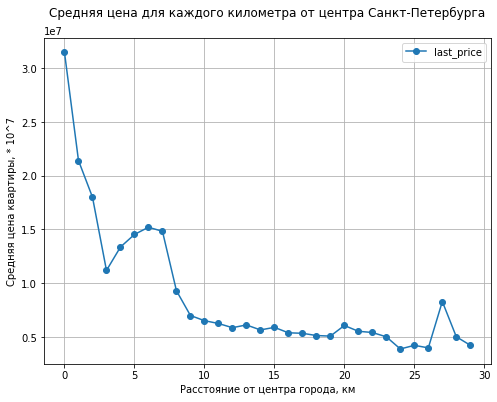

In [79]:
# строим график со средними ценами объектов для каждого километра от центра
spb_km_price.plot(grid=True, style='o-', x = 'city_centers_nearest_km',
                  y = 'last_price', figsize=(8, 6))
plt.xlabel('Расстояние от центра города, км')
plt.ylabel('Средняя цена квартиры, * 10^7')
plt.title('Средняя цена для каждого километра от центра Санкт-Петербурга\n')
plt.show()

Мы отфильтровали все объекты по городу Санкт-Петербург, а затем создали сводную таблицу по столбцу расстояний до центра города в километрах и посчитали среднюю стоимость объекта для каждого расстояния. Мы получили таблицу и по таблице построили график зависимости цены объекта от удалённости от центра города.

По графику мы видим явную зависимость цены объекта от удалённости от центра города. Прослеживается тренда: чем больше расстояние от центра города - тем ниже цена объекта. Таким образом корреляция между величинами отрицательная. Однако, график не является нисходящей линией на всем протяжении, на графике наблюдаются колебания. Цены на расстоянии от 0 до 3 км от центра резко снижается с 31,4 млн. руб. до 11,2 млн. руб., при этом в интервале от 0 до 2 км цена выше, чем по всем остальным расстояниям от центра. С 3 до 6 км цена объектов незначительно повышается по сравнению с 3 км, но остаётся ниже чем для объектов в пределах 2 км. Это может быть связано с наличием дорогой элитной недвижимости в непосредственной близости от центра Санкт-Петербурга. Затем с 6 до 9 км цена снижается, причем с 7 до 9 км происходит резкое падение цены с 14,8 млн. до 7 млн. Вероятно, примерно в 9 км от центра начинаются типовые спальные районы. С 9 км до 26 км цена снижается уже более плавно с 7 млн. до 4 млн, достигая минимума, небольшие повышения цены происходят лишь на 15, 20, 25 км. Затем на расстоянии 27 км цена резко возрастает с 4 до 8,3 млн. Вероятно, это связано с дорогой недвижимостью в курортных элитных районах Санкт-Петербурга, удалённых от центра, но лучше обустроенных по некоторым параметрам, чем спальные районы Санкт-Петербурга.

## Общий вывод

Мы построили графики, показывающие распределение и медианные значения для значительной части параметров в таблице. По медианным значениям можно описать типовую квартиру в базе объявлений. Общая площадь типовых квартир по нашей базе объявлений - 52 кв. м, жилая площадь - 30 кв. м, кухонная площадь - 9 кв. м., высота потолка - 2,65 м. Это 2-х комнатные квартиры в 9-ти этажных домах, удалённые от центра города на расстоянии 13,2 км, а от ближайшего парка - 500 метров. Средняя цена такой типорвой квартиры - 4,65 млн. руб.

В результате исследования мы выявили параметры, которые влияют на цену объекта. 

Цена объекта сильно зависит от площади (общей, жилой, кухонной) и практически не зависит от даты публикации объявления. Наибольшая зависимость цены наблюдается от общей площади: чем выше значение площади, тем выше значение цены. Коэффициент корреляции между ценой и общей площадью составляет 0,79. Также есть явная зависимость цены от жилой площади (корреляция 0,66) и площади кухни (0,58). При ценах от 10 млн. и выше (т.е. в дорогом сегменте) связь между ценой и площадью снижается, увеличивается разброс значений.

Кроме того есть заметная зависимость цены от количества комнат в квартире (корреляция 0,51). Мы наблюдаем рост средней цены при росте кол-ва комнат в квартире. При кол-ве комнат от 6 и выше зависимость уже сглаживается, что может быть связано как с малой выборкой так и тем, что для элитной недвижимости значимость кол-ва комнат снижается.

Также мы выявили зависимость цены от типа этажа квартиры: квартиры на первом этаже в среднем имеют самую низкую цену (ниже 4 млн.), а средняя цена квартиры на последнем этаже (4,3 млн.) ниже цены на квартиры между первым и последним этажами (4,8 млн.).

День, месяц и год публикации объявления не оказывают сколько-то заметного влияния на цену объекта.

Мы определили особенности сроков продажи квартир: наиболее распространенные сроки и минимальные, максимальные значения. Медианное значение срока продажи квартиры составляет 95 день. Это значит, что половина квартир были проданы в пределах этого срока. 75% квартир продалось в течение 237 дней, т.е. можно сказать, что бОльшая часть квартир продается в срок не более 8 месяцев. Быстрыми продажами мы считаем продажи в срок не более 1,5 месяцев, а необычно долгими - проджи сроком более 500 дней. В базе есть некотрое кол-во выбросов с аномально высокими сроками продажи вплоть до 1580 дней (более 4 лет).

Кроме того, мы выделили топ-10 населенных пунктов по кол-ву объявлений и посчитали средние цены одного квадратного метра для каждого из них. Максимальная цена одного квадратного метра соответсвует объектам недвижимости в Санкт-Петербурге - 114849 руб. за метр квадратный, а минимальная цена за квадратный метр соответствует городу Выборгу - 58141 руб. за метр квадратный, т.е. почти в 2 раза дешевле цены квадратного метра в Санкт-Петербурге.

Мы выявили зависимость средней цены объекта от расстояния до центра города для всех объектов в Санкт-Петербурге. Цена объекта зависит от удалённости от центра города: чем больше расстояние от центра города - тем ниже цена объекта. Однако зависимость проявляется нелинейно. Мы сделали вывод, что есть районы с элитной недвижимостью как в непосредственной близости от центра, так и на некотором удалении. Так, например, цены на расстоянии от 0 до 3 км от центра резко снижаются с 31,4 млн. руб. до 11,2 млн. руб., а с 3 до 6 км цена объектов незначительно повышается по сравнению с 3 км, но остаётся ниже чем для объектов в пределах 2 км. Кроме того, на расстоянии 27 км цена резко возрастает с 4 до 8,3 млн., что вероятно связано с дорогой недвижимостью в курортных элитных районах Санкт-Петербурга, удалённых от центра. В то же время исследование показало, что на расстоянии от 9 до 26 км от центра города цена не подвержена сильным колебаниям и снижается более плавно с 7 млн. до 4 млн. Мы считаем, что именно на такой удаленности от центра города находятся типовые спальные районы.